# DATA

IMPORT MODUL

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib
from sklearn.metrics import ConfusionMatrixDisplay

MEMANGGGIL DATA

In [2]:
file1 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/Jalan_sekunder.asc","r")

lines = file1.readlines()

array1 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            array1.append(float(a))

file1.close()

In [3]:
file2 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/Jalan_tersier.asc","r")

lines = file2.readlines()

array2 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            array2.append(float(a))

file2.close()

In [4]:
file3 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/Landuse.asc","r")

lines = file3.readlines()

array3 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            array3.append(float(a))

file3.close()

In [5]:
file4 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/NDVI.asc","r")

lines = file4.readlines()

array4 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            array4.append(float(a))

file4.close()

In [6]:
file5 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/Slope.asc","r")

lines = file5.readlines()

array5 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            array5.append(float(a))

file5.close()

In [7]:
file6 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/TWI.asc","r")

lines = file6.readlines()

array6 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            array6.append(float(a))

file6.close()

In [8]:
file7 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/Elevasi.asc","r")

lines = file7.readlines()

array7 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            array7.append(float(a))

file7.close()

In [9]:
file8 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/TRMM.asc","r")

lines = file8.readlines()

array8 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            array8.append(float(a))

file8.close()

In [10]:
file9 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/Litologi.asc","r")

lines = file9.readlines()

array9 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            array9.append(float(a))

file9.close()

In [11]:
file10 = open("C:/00. Kuliah/00. Skripsi/06 Data/00 Fix Feature/ASCII/Inventory_Longsor.asc","r")

lines = file10.readlines()

array10 =[]
index = 0
for line in lines:
    if index < 107:
        index+=1
        continue

    list_line = line.split()
    for a in list_line:
        if a != "*":
            if a>'0':
                array10.append(1)
            else:
                array10.append(0)

file10.close()

PENGECEKAN BANYAK DATA PADA SEMUA FAKTOR LONGSOR

In [12]:
print("JUMLAH DATA")
print(f'1. jln_sekunder :{len(array1)}')
print(f'2. jln_tersier :{len(array2)}')
print(f'3. landuse :{len(array3)}')
print(f'4. NDVI :{len(array4)}')
print(f'5. Slope :{len(array5)}')
print(f'6. TWI :{len(array6)}')
print(f'7. Elevasi :{len(array7)}')
print(f'8. TRMM :{len(array8)}')
print(f'9. Litologi :{len(array9)}')

print(f'10. inventory :{len(array10)}')

JUMLAH DATA
1. jln_sekunder :854963
2. jln_tersier :854963
3. landuse :854963
4. NDVI :854963
5. Slope :854963
6. TWI :854963
7. Elevasi :854963
8. TRMM :854963
9. Litologi :854963
10. inventory :854963


TABEL FEATURE DAN TARGET

In [13]:
data = {'Jl.Sekunder':array1,'Jl.Terser':array2,'Landuse':array3,'NDVI':array4,
        'Slope':array5,'TWI':array6,'Elevasi':array7,'TRMM':array8,'Litologi':array9}
target = {'Inventory':array10}

data_df = pd.DataFrame(data)
target_df = pd.DataFrame(target)

x = data_df
y = target_df

landslide = pd.merge(x,y,left_index=True,right_index=True)

landslide

,Jl.Sekunder,Jl.Terser,Landuse,NDVI,Slope,TWI,Elevasi,TRMM,Litologi,Inventory
0,0.020280,0.015578,1441.0,0.600571,8.089682,8.378140,106.0,2641.176025,100.0,0
1,0.020535,0.015436,1441.0,0.600302,5.199060,6.026731,104.0,2641.182617,100.0,0
2,0.020791,0.015298,1441.0,0.600033,7.201212,9.180512,104.0,2641.188965,100.0,0
3,0.021047,0.015164,1441.0,0.599764,9.928665,7.117791,105.0,2641.195557,100.0,0
4,0.019915,0.015488,1441.0,0.602781,11.150697,9.659223,101.0,2641.025146,100.0,0
...,...,...,...,...,...,...,...,...,...,...
854958,0.008722,0.034351,1532.0,0.636456,2.834059,4.656544,415.0,2388.905518,79.0,0
854959,0.007857,0.035426,1532.0,0.639016,9.068975,7.630423,401.0,2388.076416,79.0,0
854960,0.008056,0.035183,1532.0,0.638667,7.192831,6.811593,405.0,2388.165771,79.0,0
854961,0.008259,0.034939,1532.0,0.638318,2.334001,6.464548,407.0,2388.255371,79.0,0


MEMISAHKAN DATA LONGSOR DAN TIDAK LONGSOR 

In [14]:
longsor_positif = landslide[landslide['Inventory'].isin([1])]
longsor_negatif = landslide[landslide['Inventory'].isin([0])]

In [15]:
longsor_negatif

,Jl.Sekunder,Jl.Terser,Landuse,NDVI,Slope,TWI,Elevasi,TRMM,Litologi,Inventory
0,0.020280,0.015578,1441.0,0.600571,8.089682,8.378140,106.0,2641.176025,100.0,0
1,0.020535,0.015436,1441.0,0.600302,5.199060,6.026731,104.0,2641.182617,100.0,0
2,0.020791,0.015298,1441.0,0.600033,7.201212,9.180512,104.0,2641.188965,100.0,0
3,0.021047,0.015164,1441.0,0.599764,9.928665,7.117791,105.0,2641.195557,100.0,0
4,0.019915,0.015488,1441.0,0.602781,11.150697,9.659223,101.0,2641.025146,100.0,0
...,...,...,...,...,...,...,...,...,...,...
854958,0.008722,0.034351,1532.0,0.636456,2.834059,4.656544,415.0,2388.905518,79.0,0
854959,0.007857,0.035426,1532.0,0.639016,9.068975,7.630423,401.0,2388.076416,79.0,0
854960,0.008056,0.035183,1532.0,0.638667,7.192831,6.811593,405.0,2388.165771,79.0,0
854961,0.008259,0.034939,1532.0,0.638318,2.334001,6.464548,407.0,2388.255371,79.0,0


MEMBUAT TRANING SET DAN TESTING SET

In [16]:
#menghitung jumlah data longsor
longsor_count = array10.count(1)
print('Jumlah longsor', longsor_count)

Jumlah longsor 5557


In [17]:
#jumlah data 
n_positif1 = 1000 
n_positif2 = 3000
n_positif3 = 5557

n_quary1 = 80 
n_quary2 = 240
n_quary3 = 440

In [18]:
# If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

# However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets

Komposisi jumlah data penelitian 5557:8800

In [19]:
positif3_sampel=longsor_positif.sample(n=n_positif3,replace=False,random_state=42)

neg3_quarry1=longsor_negatif[:42471].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry2=longsor_negatif[42471:84942].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry3=longsor_negatif[84942:127413].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry4=longsor_negatif[127413:169884].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry5=longsor_negatif[169884:212355].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry6=longsor_negatif[212355:254826].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry7=longsor_negatif[254826:297297].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry8=longsor_negatif[297297:339768].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry9=longsor_negatif[339768:382239].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry10=longsor_negatif[382239:424710].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry11=longsor_negatif[424710:467181].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry12=longsor_negatif[467181:509652].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry13=longsor_negatif[509652:552123].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry14=longsor_negatif[552123:594594].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry15=longsor_negatif[594594:637065].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry16=longsor_negatif[637065:679536].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry17=longsor_negatif[679536:722007].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry18=longsor_negatif[722007:764478].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry19=longsor_negatif[764478:806949].sample(n=n_quary3,replace=False,random_state=42)
neg3_quarry20=longsor_negatif[806949:849406].sample(n=n_quary3,replace=False,random_state=42)

negatif3_sample = pd.concat([neg3_quarry1,neg3_quarry2,neg3_quarry3,neg3_quarry4,neg3_quarry5,neg3_quarry6,neg3_quarry7,
                             neg3_quarry8,neg3_quarry9,neg3_quarry10,neg3_quarry11,neg3_quarry12,neg3_quarry13,neg3_quarry14,
                             neg3_quarry15,neg3_quarry16,neg3_quarry17,neg3_quarry18,neg3_quarry19,neg3_quarry20])

negatif3_sample

,Jl.Sekunder,Jl.Terser,Landuse,NDVI,Slope,TWI,Elevasi,TRMM,Litologi,Inventory
16056,0.031018,0.000878,1471.0,0.601640,3.500454,4.796541,143.0,2627.112793,93.0,0
20516,0.011198,0.003611,1471.0,0.609113,6.378932,8.683089,89.0,2625.574463,93.0,0
9263,0.030757,0.002500,590.0,0.633359,6.954458,9.216416,133.0,2631.850342,100.0,0
7298,0.032615,0.011111,1890.0,0.632560,17.408785,4.477691,123.0,2633.549072,93.0,0
28595,0.043605,0.002833,1535.0,0.557915,4.796565,7.678177,79.0,2624.371826,35.0,0
...,...,...,...,...,...,...,...,...,...,...
844864,0.011564,0.051446,1511.0,0.609729,15.683980,5.595649,386.0,2421.268066,79.0,0
823022,0.006346,0.042984,1307.0,0.619220,11.823537,7.293873,370.0,2435.989746,79.0,0
825328,0.020392,0.044953,1498.0,0.578509,6.139505,5.975167,702.0,2455.481201,79.0,0
850485,0.008170,0.055406,2167.0,0.602098,6.751108,7.043567,379.0,2410.220215,79.0,0


SPLIT DATA

In [20]:
x_taklongsor = negatif3_sample.iloc[:,:9]
y_taklongsor = negatif3_sample.iloc[:,9:]

x_longsor = positif3_sampel.iloc[:,:9]
y_longsor = positif3_sampel.iloc[:,9:]


In [21]:
x_longsor

,Jl.Sekunder,Jl.Terser,Landuse,NDVI,Slope,TWI,Elevasi,TRMM,Litologi
751767,0.011111,0.019007,827.0,0.597305,11.141773,8.593884,367.0,2476.858887,79.0
749387,0.007683,0.016114,2103.0,0.593219,5.404640,7.269501,551.0,2489.615723,79.0
689711,0.048580,0.002561,1542.0,0.451890,27.239832,5.651691,1066.0,2534.917969,151.0
197970,0.001111,0.006724,2056.0,0.610531,9.359432,6.006179,403.0,2621.154053,79.0
347494,0.020647,0.007479,1478.0,0.600249,12.543889,9.111942,730.0,2623.592041,143.0
...,...,...,...,...,...,...,...,...,...
640332,0.021056,0.007098,1536.0,0.621698,9.821375,6.182590,509.0,2535.111084,79.0
773890,0.014299,0.020263,1530.0,0.592213,12.962822,9.586256,362.0,2463.569580,79.0
775270,0.015321,0.021346,2135.0,0.594581,3.640496,5.380386,382.0,2463.137695,79.0
807784,0.010577,0.033958,1530.0,0.626381,4.581453,6.117636,291.0,2436.355469,79.0


In [22]:
Xn = np.array(x_taklongsor)
Yn = np.array(y_taklongsor)
Xp = np.array(x_longsor)
Yp = np.array(y_longsor)

# DATA UJI

Porsi data train : test = 10% : 90%

In [23]:
Xn_train10, Xn_test90, Yn_train10, Yn_test90= train_test_split(Xn,Yn,test_size=0.9,random_state=42)

Xp_train10, Xp_test90, Yp_train10, Yp_test90 = train_test_split(Xp,Yp,test_size=0.9,random_state=42)


In [24]:
x_train10 = np.concatenate((Xn_train10,Xp_train10))
y_train10 = np.concatenate((Yn_train10,Yp_train10))
x_test90 = np.concatenate((Xn_test90,Xp_test90))
y_test90 =np.concatenate((Yn_test90,Yp_test90))

In [25]:
print ("dimensi feature",x_train10.ndim)
print ("dimensi target",y_train10.ndim)

dimensi feature 2
dimensi target 2


In [26]:
y_train10 = y_train10.flatten()
y_test90 = y_test90.flatten()

In [27]:
print ("dimensi target",y_train10.ndim)

dimensi target 1


In [28]:
print(f'y_train: {y_train10}')
print(f'y_test: {y_test90}')

y_train: [0 0 0 ... 1 1 1]
y_test: [0 0 0 ... 1 1 1]


Porsi data train : test = 20% : 80%

In [29]:
Xn_train20, Xn_test80, Yn_train20, Yn_test80 = train_test_split(Xn,Yn,test_size=0.8,random_state=42)

Xp_train20, Xp_test80, Yp_train20, Yp_test80 = train_test_split(Xp,Yp,test_size=0.8,random_state=42)

In [30]:
x_train20 = np.concatenate((Xn_train20,Xp_train20))
y_train20 = np.concatenate((Yn_train20,Yp_train20))
x_test80 = np.concatenate((Xn_test80,Xp_test80))
y_test80 =np.concatenate((Yn_test80,Yp_test80))

In [31]:
print ("dimensi feature",x_train20.ndim)
print ("dimensi target",y_train20.ndim)

dimensi feature 2
dimensi target 2


In [32]:
y_train20 = y_train20.flatten()
y_test80 = y_test80.flatten()

In [33]:
print(f'y_train: {y_train20}')
print(f'y_test: {y_test80}')

y_train: [0 0 0 ... 1 1 1]
y_test: [0 0 0 ... 1 1 1]


Porsi data train : test = 30% : 70%

In [34]:
Xn_train30, Xn_test70, Yn_train30, Yn_test70 = train_test_split(Xn,Yn,test_size=0.7,random_state=42)

Xp_train30, Xp_test70, Yp_train30, Yp_test70 = train_test_split(Xp,Yp,test_size=0.7,random_state=42)

In [35]:
x_train30 = np.concatenate((Xn_train30,Xp_train30))
y_train30 = np.concatenate((Yn_train30,Yp_train30))
x_test70 = np.concatenate((Xn_test70,Xp_test70))
y_test70 = np.concatenate((Yn_test70,Yp_test70))

In [36]:
print ("dimensi feature",x_train30.ndim)
print ("dimensi target",y_train30.ndim)

dimensi feature 2
dimensi target 2


In [37]:
y_train30 = y_train30.flatten()
y_test70 = y_test70.flatten()

In [38]:
print(f'y_train: {y_train30}')
print(f'y_test: {y_test70}')

y_train: [0 0 0 ... 1 1 1]
y_test: [0 0 0 ... 1 1 1]


Porsi data train : test = 40% : 60%

In [39]:
Xn_train40, Xn_test60, Yn_train40, Yn_test60 = train_test_split(Xn,Yn,test_size=0.6,random_state=42)

Xp_train40, Xp_test60, Yp_train40, Yp_test60 = train_test_split(Xp,Yp,test_size=0.6,random_state=42)

In [40]:
x_train40 = np.concatenate((Xn_train40,Xp_train40))
y_train40 = np.concatenate((Yn_train40,Yp_train40))
x_test60 = np.concatenate((Xn_test60,Xp_test60))
y_test60 = np.concatenate((Yn_test60,Yp_test60))

In [41]:
print ("dimensi feature",x_train40.ndim)
print ("dimensi target",y_train40.ndim)

dimensi feature 2
dimensi target 2


In [42]:
y_train40 = y_train40.flatten()
y_test60 = y_test60.flatten()

In [43]:
print(f'y_train: {y_train40}')
print(f'y_test: {y_test60}')

y_train: [0 0 0 ... 1 1 1]
y_test: [0 0 0 ... 1 1 1]


Porsi data train : test = 50% : 50%

In [44]:
Xn_train50, Xn_test50, Yn_train50, Yn_test50 = train_test_split(Xn,Yn,test_size=0.5,random_state=42)

Xp_train50, Xp_test50, Yp_train50, Yp_test50 = train_test_split(Xp,Yp,test_size=0.5,random_state=42)

In [45]:
x_train50 = np.concatenate((Xn_train50,Xp_train50))
y_train50 = np.concatenate((Yn_train50,Yp_train50))
x_test50 = np.concatenate((Xn_test50,Xp_test50))
y_test50 =np.concatenate((Yn_test50,Yp_test50))

In [46]:
print ("dimensi feature",x_train50.ndim)
print ("dimensi target",y_train50.ndim)

dimensi feature 2
dimensi target 2


In [47]:
y_train50 = y_train50.flatten()
y_test50 = y_test50.flatten()

In [48]:
print(f'y_train: {y_train50}')
print(f'y_test: {y_test50}')

y_train: [0 0 0 ... 1 1 1]
y_test: [0 0 0 ... 1 1 1]


Porsi data train : test = 60% : 40%

In [49]:
Xn_train60, Xn_test40, Yn_train60, Yn_test40 = train_test_split(Xn,Yn,test_size=0.4,random_state=42)

Xp_train60, Xp_test40, Yp_train60, Yp_test40 = train_test_split(Xp,Yp,test_size=0.4,random_state=42)

In [50]:
x_train60 = np.concatenate((Xn_train60,Xp_train60))
y_train60 = np.concatenate((Yn_train60,Yp_train60))
x_test40 = np.concatenate((Xn_test40,Xp_test40))
y_test40 = np.concatenate((Yn_test40,Yp_test40))

In [51]:
print ("dimensi feature",x_train60.ndim)
print ("dimensi target",y_train60.ndim)

dimensi feature 2
dimensi target 2


In [52]:
y_train60 = y_train60.flatten()
y_test40 = y_test40.flatten()

In [53]:
print(f'y_train: {y_train60}')
print(f'y_test: {y_test40}')

y_train: [0 0 0 ... 1 1 1]
y_test: [0 0 0 ... 1 1 1]


Porsi data train : test = 70% : 30%

In [54]:
Xn_train70, Xn_test30, Yn_train70, Yn_test30 = train_test_split(Xn,Yn,test_size=0.3,random_state=42)

Xp_train70, Xp_test30, Yp_train70, Yp_test30 = train_test_split(Xp,Yp,test_size=0.3,random_state=42)

In [55]:
x_train70 = np.concatenate((Xn_train70,Xp_train70))
y_train70 = np.concatenate((Yn_train70,Yp_train70))
x_test30 = np.concatenate((Xn_test30,Xp_test30))
y_test30 =np.concatenate((Yn_test30,Yp_test30))

In [56]:
print ("dimensi feature",x_train70.ndim)
print ("dimensi target",y_train70.ndim)

dimensi feature 2
dimensi target 2


In [57]:
y_train70 = y_train70.flatten()
y_test30 = y_test30.flatten()

In [58]:
print(f'y_train: {y_train70}')
print(f'y_test: {y_test30}')

y_train: [0 0 0 ... 1 1 1]
y_test: [0 0 0 ... 1 1 1]


Porsi data train : test = 80% : 20%

In [59]:
Xn_train80, Xn_test20, Yn_train80, Yn_test20 = train_test_split(Xn,Yn,test_size=0.2,random_state=42)

Xp_train80, Xp_test20, Yp_train80, Yp_test20 = train_test_split(Xp,Yp,test_size=0.2,random_state=42)

In [60]:
x_train80 = np.concatenate((Xn_train80,Xp_train80))
y_train80 = np.concatenate((Yn_train80,Yp_train80))
x_test20 = np.concatenate((Xn_test20,Xp_test20))
y_test20 = np.concatenate((Yn_test20,Yp_test20))

In [61]:
print ("dimensi feature",x_train80.ndim)
print ("dimensi target",y_train80.ndim)

dimensi feature 2
dimensi target 2


In [62]:
y_train80 = y_train80.flatten()
y_test20 = y_test20.flatten()

In [63]:
print(f'y_train: {y_train80}')
print(f'y_test: {y_test20}')

y_train: [0 0 0 ... 1 1 1]
y_test: [0 0 0 ... 1 1 1]


Porsi data train : test = 90% : 10%

In [64]:
Xn_train90, Xn_test10, Yn_train90, Yn_test10 = train_test_split(Xn,Yn,test_size=0.1,random_state=42)

Xp_train90, Xp_test10, Yp_train90, Yp_test10 = train_test_split(Xp,Yp,test_size=0.1,random_state=42)

In [65]:
x_train90 = np.concatenate((Xn_train90,Xp_train90))
y_train90 = np.concatenate((Yn_train90,Yp_train90))
x_test10 = np.concatenate((Xn_test10,Xp_test10))
y_test10 = np.concatenate((Yn_test10,Yp_test10))

In [66]:
print ("dimensi feature",x_train90.ndim)
print ("dimensi target",y_train90.ndim)

dimensi feature 2
dimensi target 2


In [67]:
y_train90 = y_train90.flatten()
y_test10 = y_test10.flatten()

In [68]:
print(f'y_train: {y_train90}')
print(f'y_test: {y_test10}')

y_train: [0 0 0 ... 1 1 1]
y_test: [0 0 0 ... 1 1 1]


# CEK PARAMETER

Cek Parameter Setiap Proporsi (SVM)

In [69]:
x_all = np.concatenate((Xn,Xp))
y_all = np.concatenate((Yn,Yp))

y_all = y_all.flatten()

In [70]:
classifiers =[]

rf = RandomForestClassifier(random_state = 0)
classifiers.append(rf)

svm = SVC (random_state=0, probability=True)
classifiers.append(svm)

knn = KNeighborsClassifier()
classifiers.append(knn)

In [77]:
parameters=[]
parameters_rf = {"criterion":['gini'],
               "n_estimators":[1200]}
parameters.append(parameters_rf)

parameters_svm = {"gamma": [0.002,0.003,0.004,0.005,0.008,0.009,'scale','auto'],
               "C":[1,2,3,4,5]}
parameters.append(parameters_svm)

parameters_knn = {"n_neighbors": [3,5,7,9,11,13],
                 "weights": ['uniform','distance'],
                 "leaf_size":[20,25,30]}
parameters.append(parameters_knn)

In [78]:
from tqdm import tqdm
def gridSearchCV(models,params,count):
    best_models=[]
    indexes = ['RF0','SVM','KNN']
    for i,idx in zip (tqdm(range(0,count)), indexes):
        model_grid = GridSearchCV(models[i], parameters[i], verbose=4, cv=10,refit="roc_auc",
                      scoring="roc_auc")
        model = model_grid.fit(x_all,y_all)
        df = pd.DataFrame(model.cv_results_)
        df.to_excel (f'{idx} Grid Search.xlsx')
        best_models.append(model.best_estimator_)
    return best_models

best_model_list = gridSearchCV(classifiers,parameters,3)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END criterion=gini, n_estimators=1200;, score=1.000 total time= 1.4min
[CV 2/10] END criterion=gini, n_estimators=1200;, score=0.997 total time= 1.4min
[CV 3/10] END criterion=gini, n_estimators=1200;, score=0.986 total time= 1.4min
[CV 4/10] END criterion=gini, n_estimators=1200;, score=0.988 total time= 1.3min
[CV 5/10] END criterion=gini, n_estimators=1200;, score=0.973 total time= 1.3min
[CV 6/10] END criterion=gini, n_estimators=1200;, score=0.976 total time= 1.8min
[CV 7/10] END criterion=gini, n_estimators=1200;, score=0.908 total time= 1.2min
[CV 8/10] END criterion=gini, n_estimators=1200;, score=0.871 total time= 1.2min
[CV 9/10] END criterion=gini, n_estimators=1200;, score=0.906 total time= 1.2min
[CV 10/10] END criterion=gini, n_estimators=1200;, score=0.741 total time= 1.3min


 33%|███▎      | 1/3 [15:00<30:01, 900.91s/it]

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END .................C=1, gamma=0.002;, score=0.991 total time= 1.4min
[CV 2/10] END .................C=1, gamma=0.002;, score=0.975 total time= 1.4min
[CV 3/10] END .................C=1, gamma=0.002;, score=0.956 total time= 1.3min
[CV 4/10] END .................C=1, gamma=0.002;, score=0.950 total time= 1.3min
[CV 5/10] END .................C=1, gamma=0.002;, score=0.918 total time= 1.3min
[CV 6/10] END .................C=1, gamma=0.002;, score=0.931 total time= 1.3min
[CV 7/10] END .................C=1, gamma=0.002;, score=0.932 total time= 1.3min
[CV 8/10] END .................C=1, gamma=0.002;, score=0.889 total time= 1.3min
[CV 9/10] END .................C=1, gamma=0.002;, score=0.927 total time= 1.3min
[CV 10/10] END ................C=1, gamma=0.002;, score=0.917 total time= 1.3min
[CV 1/10] END .................C=1, gamma=0.003;, score=0.993 total time= 1.5min
[CV 2/10] END .................C=1, gamma=0.00

 67%|██████▋   | 2/3 [18:54:23<11:04:38, 39878.12s/it]

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV 1/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.993 total time=   0.1s
[CV 2/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.977 total time=   0.0s
[CV 3/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.912 total time=   0.0s
[CV 4/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.905 total time=   0.0s
[CV 5/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.863 total time=   0.0s
[CV 6/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.880 total time=   0.0s
[CV 7/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.828 total time=   0.0s
[CV 8/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.733 total time=   0.0s
[CV 9/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.786 total time=   0.0s
[CV 10/10] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.691 total time=   0.0s
[CV 1/10] END le

100%|██████████| 3/3 [18:54:52<00:00, 22697.65s/it]   


In [79]:
best_model_list

[RandomForestClassifier(n_estimators=1200, random_state=0),
 SVC(C=2, gamma=0.009, probability=True, random_state=0),
 KNeighborsClassifier(leaf_size=20, n_neighbors=7, weights='distance')]

In [80]:
vc1 = VotingClassifier(estimators=[('rf', best_model_list[0]), ('svm', best_model_list[1]), 
                                       ('knn', best_model_list[2])], 
                            voting='soft',weights=[1,1,1])

vc2 = VotingClassifier(estimators=[('rf', best_model_list[0]), ('svm', best_model_list[1]), 
                                       ('knn', best_model_list[2])], 
                            voting='soft',weights=[2,1,1])

In [85]:
index = ['1','2']
ensamble = [vc1, vc2]
for a,idx in zip(ensamble,index):
    cv_result = cross_val_score(a,x_all,y_all, cv = 10, scoring='roc_auc')
    cv = pd.DataFrame(cv_result)
    cv.to_excel (f"VC {idx} Grid Search.xlsx")

# TRAINING MODEL

In [86]:
# Wadah semua model
est1 = []

# Model Random Forest
model1 = RandomForestClassifier (random_state=0, n_estimators= 800, criterion = 'entropy') 
est1.append(('RF',model1))

# Model SVM
model2 = SVC (random_state=0, gamma = 0.008, C = 1, probability=True)
est1.append(('SVM',model2))

# Model LR
model3 = KNeighborsClassifier (n_neighbors = 11, weights= 'distance', leaf_size = 20)
est1.append(('KNN',model3))

# Wadah semua model
est2 = []

# Model Random Forest
model1 = RandomForestClassifier (random_state=0, n_estimators= 750, criterion = 'entropy') 
est2.append(('RF',model1))

# Model SVM
model2 = SVC (random_state=0, gamma = 0.008, C = 1, probability=True)
est2.append(('SVM',model2))

# Model LR
model3 = KNeighborsClassifier (n_neighbors = 11, weights= 'distance', leaf_size = 20)
est2.append(('KNN',model3))

# Wadah semua model
est3 = []

# Model Random Forest
model1 = RandomForestClassifier (random_state=0, n_estimators= 1200, criterion = 'gini') 
est3.append(('RF',model1))

# Model SVM
model2 = SVC (random_state=0, C=2, gamma=0.009, probability=True)
est3.append(('SVM',model2))

# Model LR
model3 = KNeighborsClassifier (leaf_size=20, n_neighbors=7, weights='distance')
est3.append(('KNN',model3))


# Wadah semua model
est4 = []

# Model Random Forest
model1 = RandomForestClassifier (random_state=0, n_estimators= 750, criterion = 'entropy') 
est4.append(('RF',model1))

# Model SVM
model2 = SVC (random_state=0, gamma = 0.005, C = 1, probability=True)
est4.append(('SVM',model2))

# Model LR
model3 = KNeighborsClassifier (n_neighbors = 11, weights= 'distance', leaf_size = 20)
est4.append(('KNN',model3))

#Ensemble
e1 = VotingClassifier(est1, voting='soft', weights=[1,1,1])
e2 = VotingClassifier(est2, voting='soft', weights=[1,1,1])
e3 = VotingClassifier(est3, voting='soft', weights=[1,1,1])
e4 = VotingClassifier(est4, voting='soft', weights=[1,1,1])
e5 = VotingClassifier(est1, voting='soft', weights=[2,1,1])
e6 = VotingClassifier(est2, voting='soft', weights=[2,1,1])
e7 = VotingClassifier(est3, voting='soft', weights=[2,1,1])
e8 = VotingClassifier(est4, voting='soft', weights=[2,1,1])

In [89]:
ensembles = [e7]
indexes = ["3.7"]
komposisi = 3
for ens, idxs in zip(ensembles, indexes):
    ensemble = ens
    CV90 = ensemble.fit(x_train90, y_train90)
    joblib.dump(CV90, f"{idxs} Komposisi {komposisi}.joblib")

In [92]:
ensembles = [e7]
indexes = ["3.7"]
for ens, idxs in zip(ensembles, indexes):
    ensemble = ens
    RSRF10 = ensemble.fit(x_train10, y_train10)
    y_pred4_10 = RSRF10.predict(x_test90)
    RSRF20 = ensemble.fit(x_train20, y_train20)
    y_pred4_20 = RSRF20.predict(x_test80)
    RSRF30 = ensemble.fit(x_train30, y_train30)
    y_pred4_30 = RSRF30.predict(x_test70)
    RSRF40 = ensemble.fit(x_train40, y_train40)
    y_pred4_40 = RSRF40.predict(x_test60)
    RSRF50 = ensemble.fit(x_train50, y_train50)
    y_pred4_50 = RSRF50.predict(x_test50)
    RSRF60 = ensemble.fit(x_train60, y_train60)
    y_pred4_60 = RSRF60.predict(x_test40)
    RSRF70 = ensemble.fit(x_train70, y_train70)
    y_pred4_70 = RSRF70.predict(x_test30)
    RSRF80 = ensemble.fit(x_train80, y_train80)
    y_pred4_80 = RSRF80.predict(x_test20)
    RSRF90 = ensemble.fit(x_train90, y_train90)
    y_pred4_90 = RSRF90.predict(x_test10)

    joblib.dump(RSRF80, f"{idxs} 80 Komposisi 3.joblib")
    joblib.dump(RSRF90, f"{idxs} 90 Komposisi 3.joblib")

    matrix1_10 = confusion_matrix(y_test90, y_pred4_10)
    tn_10, fp_10, fn_10, tp_10 = matrix1_10.ravel()
    matrix1_20 = confusion_matrix(y_test80, y_pred4_20)
    tn_20, fp_20, fn_20, tp_20 = matrix1_20.ravel()
    matrix1_30 = confusion_matrix(y_test70, y_pred4_30)
    tn_30, fp_30, fn_30, tp_30 = matrix1_30.ravel()
    matrix1_40 = confusion_matrix(y_test60, y_pred4_40)
    tn_40, fp_40, fn_40, tp_40 = matrix1_40.ravel()
    matrix1_50 = confusion_matrix(y_test50, y_pred4_50)
    tn_50, fp_50, fn_50, tp_50 = matrix1_50.ravel()
    matrix1_60 = confusion_matrix(y_test40, y_pred4_60)
    tn_60, fp_60, fn_60, tp_60 = matrix1_60.ravel()
    matrix1_70 = confusion_matrix(y_test30, y_pred4_70)
    tn_70, fp_70, fn_70, tp_70 = matrix1_70.ravel()
    matrix1_80 = confusion_matrix(y_test20, y_pred4_80)
    tn_80, fp_80, fn_80, tp_80 = matrix1_80.ravel()
    matrix1_90 = confusion_matrix(y_test10, y_pred4_90)
    tn_90, fp_90, fn_90, tp_90 = matrix1_90.ravel()

    confusion10 = (tn_10, fp_10, fn_10, tp_10)
    confusion20 = (tn_20, fp_20, fn_20, tp_20)
    confusion30 = (tn_30, fp_30, fn_30, tp_30)
    confusion40 = (tn_40, fp_40, fn_40, tp_40)
    confusion50 = (tn_50, fp_50, fn_50, tp_50)
    confusion60 = (tn_60, fp_60, fn_60, tp_60)
    confusion70 = (tn_70, fp_70, fn_70, tp_70)
    confusion80 = (tn_80, fp_80, fn_80, tp_80)
    confusion90 = (tn_90, fp_90, fn_90, tp_90)

    confusion = pd.DataFrame(np.array([confusion10, confusion20, confusion30, confusion40, confusion50, confusion60, confusion70, confusion80, confusion90]),index=[10,20,30,40,50,60,70,80,90], columns=['TN','FP','FN','TP'])
    confusion.to_excel(f'{idxs} Confusion.xlsx')
    
    fpr_10, tpr_10, threshhold_10 = roc_curve(y_test90, y_pred4_10)
    fpr_20, tpr_20, threshhold_20 = roc_curve(y_test80, y_pred4_20)
    fpr_30, tpr_30, threshhold_30 = roc_curve(y_test70, y_pred4_30)
    fpr_40, tpr_40, threshhold_40 = roc_curve(y_test60, y_pred4_40)
    fpr_50, tpr_50, threshhold_50 = roc_curve(y_test50, y_pred4_50)
    fpr_60, tpr_60, threshhold_60 = roc_curve(y_test40, y_pred4_60)
    fpr_70, tpr_70, threshhold_70 = roc_curve(y_test30, y_pred4_70)
    fpr_80, tpr_80, threshhold_80 = roc_curve(y_test20, y_pred4_80)
    fpr_90, tpr_90, threshhold_90 = roc_curve(y_test10, y_pred4_90)

    nilai_auc_10 = auc(fpr_10, tpr_10)
    nilai_auc_20 = auc(fpr_20, tpr_20)
    nilai_auc_30 = auc(fpr_30, tpr_30)
    nilai_auc_40 = auc(fpr_40, tpr_40)
    nilai_auc_50 = auc(fpr_50, tpr_50)
    nilai_auc_60 = auc(fpr_60, tpr_60)
    nilai_auc_70 = auc(fpr_70, tpr_70)
    nilai_auc_80 = auc(fpr_80, tpr_80)
    nilai_auc_90 = auc(fpr_90, tpr_90)

    plt.plot(fpr_10, tpr_10, 'b', label=f'AUC_10={nilai_auc_10}')
    plt.plot(fpr_20, tpr_20, 'r', label=f'AUC_20={nilai_auc_20}')
    plt.plot(fpr_30, tpr_30, 'g', label=f'AUC_30={nilai_auc_30}')
    plt.plot(fpr_40, tpr_40, 'y', label=f'AUC_40={nilai_auc_40}')
    plt.plot(fpr_50, tpr_50, 'p', label=f'AUC_50={nilai_auc_50}')
    plt.plot(fpr_60, tpr_60, 'c', label=f'AUC_60={nilai_auc_60}')
    plt.plot(fpr_70, tpr_70, 'b', label=f'AUC_70={nilai_auc_70}')
    plt.plot(fpr_80, tpr_80, 'o', label=f'AUC_80={nilai_auc_80}')
    plt.plot(fpr_90, tpr_90, 'r', label=f'AUC_90={nilai_auc_90}')

    plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")
    plt.title('ROC: Receiver Operating Characteristics')
    plt.xlabel('Fallout or False Positive Rate')
    plt.ylabel('Recall or True Positive Rate')
    plt.legend()
    plt.savefig(f'{idxs} ROC.png')
    plt.clf()

    data_auc = {'10:90':nilai_auc_10,'20:80':nilai_auc_20,'30:70':nilai_auc_30,'40:60':nilai_auc_40,'50:50':nilai_auc_50,'60:40':nilai_auc_60,'70:30':nilai_auc_70,'80:20':nilai_auc_80,'90:10':nilai_auc_90}
    proporsi = list(data_auc.keys())
    nilai_auc = list(data_auc.values())
    AUC = pd.DataFrame(nilai_auc).T
    AUC.to_excel(f"{idxs} AUC.xlsx")

    plt.bar(proporsi, nilai_auc)
    plt.title('NILAI AUC PROPORSI 5557:8800')
    plt.xlabel('Proporsi')
    plt.ylabel('AUC')
    plt.savefig(f'{idxs} AUC.png')
    plt.clf()

    x_all = np.concatenate((Xn,Xp))
    y_all = np.concatenate((Yn,Yp))
    y_all = y_all.flatten()
    cv_result = cross_val_score(ensemble,x_all, y_all, cv = 10, scoring='roc_auc')
    cv = pd.DataFrame(cv_result).T
    cv.to_excel(f"{idxs} CV.xlsx")

OSError: [Errno 28] No space left on device

# TRAINING MODEL SINGLE

In [69]:
# Wadah semua model
estimators = []

# Model Random Forest
model1 = RandomForestClassifier (random_state=0,n_estimators = 800, criterion = 'entropy', max_features = 'sqrt') 
estimators.append(('RF',model1))

# Model SVM
model2 = SVC (random_state=0, kernel = 'rbf', gamma = 0.008, C = 1, probability=True)
estimators.append(('SVM',model2))

# Model LR
model3 = KNeighborsClassifier (n_neighbors = 11, weights = 'distance', leaf_size = 20)
estimators.append(('LR',model3))

#Ensemble
ensemble = VotingClassifier(estimators, voting='soft', weights=[2,1,1])

Proporsi 10 : 90

In [310]:
ensemble_10 = ensemble.fit(x_train10, y_train10)
y_pred4_10 = ensemble_10.predict(x_test90)

Proporsi 20 : 80

In [311]:
ensemble_20 = ensemble.fit(x_train20, y_train20)
y_pred4_20 = ensemble_20.predict(x_test80)

Proporsi 30 : 70

In [312]:
ensemble_30 = ensemble.fit(x_train30, y_train30)
y_pred4_30 = ensemble_30.predict(x_test70)

Proporsi 40 : 60

In [313]:
ensemble_40 = ensemble.fit(x_train40, y_train40)
y_pred4_40 = ensemble_40.predict(x_test60)

Proporsi 50 : 50

In [314]:
ensemble_50 = ensemble.fit(x_train50, y_train50)
y_pred4_50 = ensemble_50.predict(x_test50)

Proporsi 60 : 40

In [315]:
ensemble_60 = ensemble.fit(x_train60, y_train60)
y_pred4_60 = ensemble_60.predict(x_test40)

Proporsi 70 : 30

In [316]:
ensemble_70 = ensemble.fit(x_train70, y_train70)
y_pred4_70 = ensemble_70.predict(x_test30)

Proporsi 80 : 20

In [317]:
ensemble_80 = ensemble.fit(x_train80, y_train80)
y_pred4_80 = ensemble_80.predict(x_test20)

Proporsi 90 : 10

In [70]:
ensemble_90 = ensemble.fit(x_train90, y_train90)
y_pred4_90 = ensemble_90.predict(x_test10)

MENYIMPAN MODUL

In [71]:
joblib.dump(ensemble_90, 'VC.3.1.joblib')

['VC.3.1.joblib']

Confussion Matrix

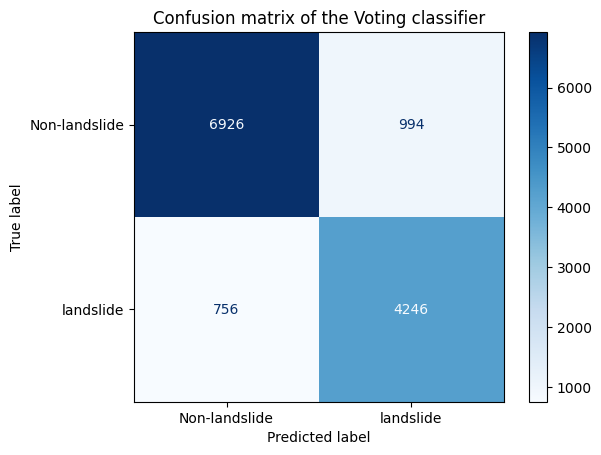

In [319]:
ConfusionMatrixDisplay.from_predictions(y_test90, y_pred4_10, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the Voting classifier')
plt.show()

In [320]:
matrix1_10 = confusion_matrix(y_test90, y_pred4_10)
tn_10, fp_10, fn_10, tp_10 = matrix1_10.ravel()

print(f'TN: {tn_10}')
print(f'FP: {fp_10}')
print(f'FN: {fn_10}')
print(f'TP: {tp_10}')

TN: 6926
FP: 994
FN: 756
TP: 4246


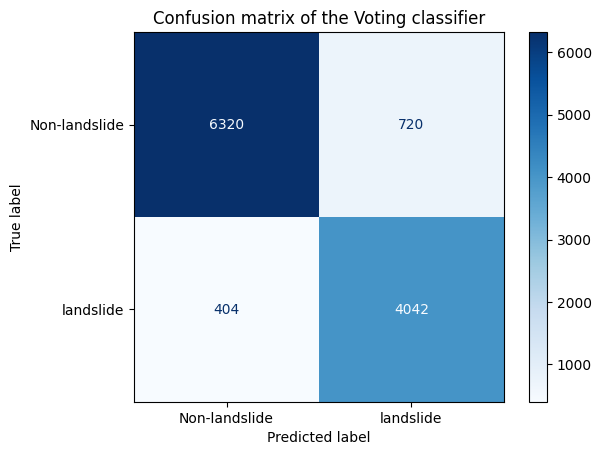

In [321]:
ConfusionMatrixDisplay.from_predictions(y_test80, y_pred4_20, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the Voting classifier')
plt.show()

In [322]:
matrix1_20 = confusion_matrix(y_test80, y_pred4_20)
tn_20, fp_20, fn_20, tp_20 = matrix1_20.ravel()

print(f'TN: {tn_20}')
print(f'FP: {fp_20}')
print(f'FN: {fn_20}')
print(f'TP: {tp_20}')

TN: 6320
FP: 720
FN: 404
TP: 4042


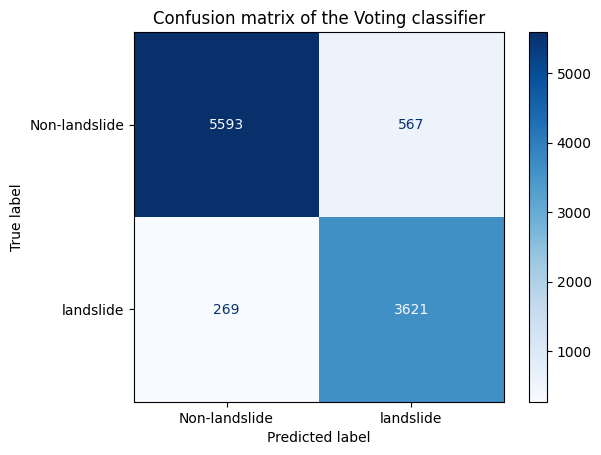

In [323]:
ConfusionMatrixDisplay.from_predictions(y_test70, y_pred4_30, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the Voting classifier')
plt.show()

In [324]:
matrix1_30 = confusion_matrix(y_test70, y_pred4_30)
tn_30, fp_30, fn_30, tp_30 = matrix1_30.ravel()

print(f'TN: {tn_30}')
print(f'FP: {fp_30}')
print(f'FN: {fn_30}')
print(f'TP: {tp_30}')

TN: 5593
FP: 567
FN: 269
TP: 3621


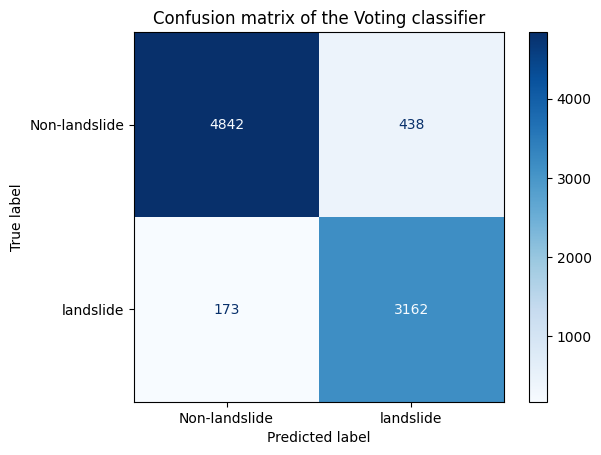

In [325]:
ConfusionMatrixDisplay.from_predictions(y_test60, y_pred4_40, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the Voting classifier')
plt.show()

In [326]:
matrix1_40 = confusion_matrix(y_test60, y_pred4_40)
tn_40, fp_40, fn_40, tp_40 = matrix1_40.ravel()

print(f'TN: {tn_40}')
print(f'FP: {fp_40}')
print(f'FN: {fn_40}')
print(f'TP: {tp_40}')

TN: 4842
FP: 438
FN: 173
TP: 3162


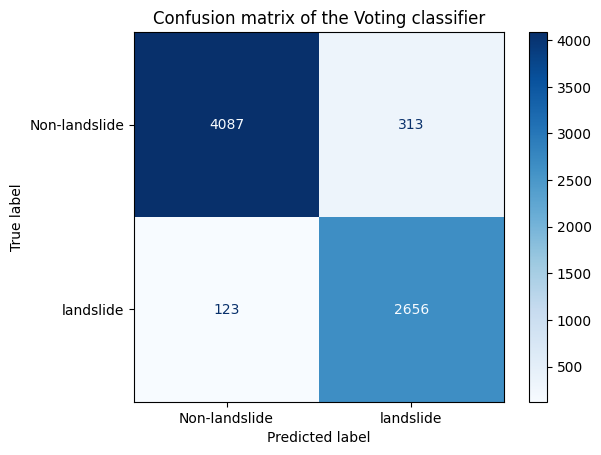

In [327]:
ConfusionMatrixDisplay.from_predictions(y_test50, y_pred4_50, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the Voting classifier')
plt.show()

In [328]:
matrix1_50 = confusion_matrix(y_test50, y_pred4_50)
tn_50, fp_50, fn_50, tp_50 = matrix1_50.ravel()

print(f'TN: {tn_50}')
print(f'FP: {fp_50}')
print(f'FN: {fn_50}')
print(f'TP: {tp_50}')

TN: 4087
FP: 313
FN: 123
TP: 2656


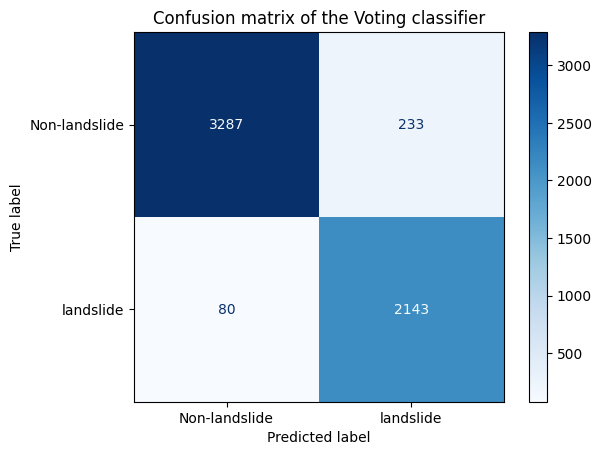

In [329]:
ConfusionMatrixDisplay.from_predictions(y_test40, y_pred4_60, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the Voting classifier')
plt.show()

In [330]:
matrix1_60 = confusion_matrix(y_test40, y_pred4_60)
tn_60, fp_60, fn_60, tp_60 = matrix1_60.ravel()

print(f'TN: {tn_60}')
print(f'FP: {fp_60}')
print(f'FN: {fn_60}')
print(f'TP: {tp_60}')

TN: 3287
FP: 233
FN: 80
TP: 2143


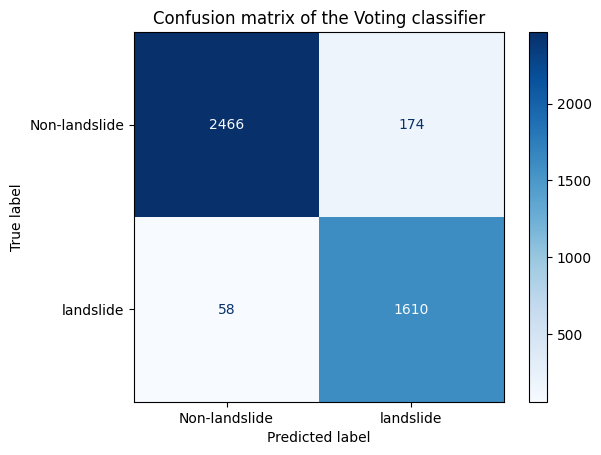

In [331]:
ConfusionMatrixDisplay.from_predictions(y_test30, y_pred4_70, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the Voting classifier')
plt.show()

In [332]:
matrix1_70 = confusion_matrix(y_test30, y_pred4_70)
tn_70, fp_70, fn_70, tp_70 = matrix1_70.ravel()

print(f'TN: {tn_70}')
print(f'FP: {fp_70}')
print(f'FN: {fn_70}')
print(f'TP: {tp_70}')

TN: 2466
FP: 174
FN: 58
TP: 1610


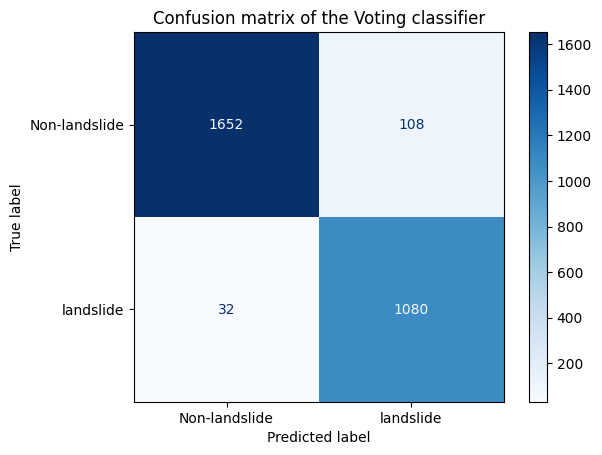

In [333]:
ConfusionMatrixDisplay.from_predictions(y_test20, y_pred4_80, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the Voting classifier')
plt.show()

In [334]:
matrix1_80 = confusion_matrix(y_test20, y_pred4_80)
tn_80, fp_80, fn_80, tp_80 = matrix1_80.ravel()

print(f'TN: {tn_80}')
print(f'FP: {fp_80}')
print(f'FN: {fn_80}')
print(f'TP: {tp_80}')

TN: 1652
FP: 108
FN: 32
TP: 1080


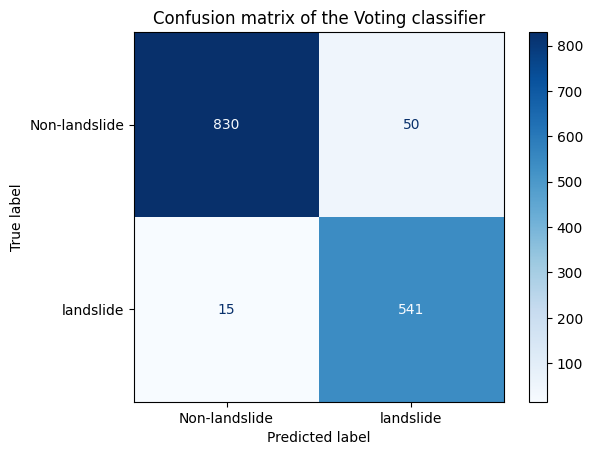

In [335]:
ConfusionMatrixDisplay.from_predictions(y_test10, y_pred4_90, 
                                        cmap="Blues", 
                                        display_labels=["Non-landslide", "landslide"])

plt.title('Confusion matrix of the Voting classifier')
plt.show()

In [336]:
matrix1_90 = confusion_matrix(y_test10, y_pred4_90)
tn_90, fp_90, fn_90, tp_90 = matrix1_90.ravel()

print(f'TN: {tn_90}')
print(f'FP: {fp_90}')
print(f'FN: {fn_90}')
print(f'TP: {tp_90}')

TN: 830
FP: 50
FN: 15
TP: 541


Grafik ROC

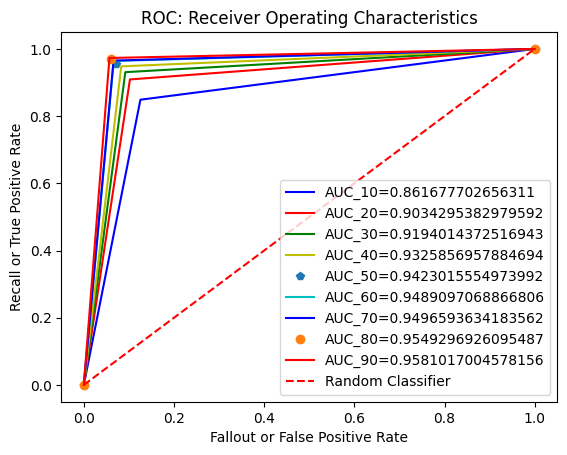

In [337]:
fpr_10, tpr_10, threshhold_10 = roc_curve(y_test90, y_pred4_10)
fpr_20, tpr_20, threshhold_20 = roc_curve(y_test80, y_pred4_20)
fpr_30, tpr_30, threshhold_30 = roc_curve(y_test70, y_pred4_30)
fpr_40, tpr_40, threshhold_40 = roc_curve(y_test60, y_pred4_40)
fpr_50, tpr_50, threshhold_50 = roc_curve(y_test50, y_pred4_50)
fpr_60, tpr_60, threshhold_60 = roc_curve(y_test40, y_pred4_60)
fpr_70, tpr_70, threshhold_70 = roc_curve(y_test30, y_pred4_70)
fpr_80, tpr_80, threshhold_80 = roc_curve(y_test20, y_pred4_80)
fpr_90, tpr_90, threshhold_90 = roc_curve(y_test10, y_pred4_90)

nilai_auc_10 = auc(fpr_10, tpr_10)
nilai_auc_20 = auc(fpr_20, tpr_20)
nilai_auc_30 = auc(fpr_30, tpr_30)
nilai_auc_40 = auc(fpr_40, tpr_40)
nilai_auc_50 = auc(fpr_50, tpr_50)
nilai_auc_60 = auc(fpr_60, tpr_60)
nilai_auc_70 = auc(fpr_70, tpr_70)
nilai_auc_80 = auc(fpr_80, tpr_80)
nilai_auc_90 = auc(fpr_90, tpr_90)

plt.plot(fpr_10, tpr_10, 'b', label=f'AUC_10={nilai_auc_10}')
plt.plot(fpr_20, tpr_20, 'r', label=f'AUC_20={nilai_auc_20}')
plt.plot(fpr_30, tpr_30, 'g', label=f'AUC_30={nilai_auc_30}')
plt.plot(fpr_40, tpr_40, 'y', label=f'AUC_40={nilai_auc_40}')
plt.plot(fpr_50, tpr_50, 'p', label=f'AUC_50={nilai_auc_50}')
plt.plot(fpr_60, tpr_60, 'c', label=f'AUC_60={nilai_auc_60}')
plt.plot(fpr_70, tpr_70, 'b', label=f'AUC_70={nilai_auc_70}')
plt.plot(fpr_80, tpr_80, 'o', label=f'AUC_80={nilai_auc_80}')
plt.plot(fpr_90, tpr_90, 'r', label=f'AUC_90={nilai_auc_90}')

plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")
plt.title('ROC: Receiver Operating Characteristics')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

In [338]:
AUC = []
AUC.append(nilai_auc_10)
AUC.append(nilai_auc_20)
AUC.append(nilai_auc_30)
AUC.append(nilai_auc_40)
AUC.append(nilai_auc_50)
AUC.append(nilai_auc_60)
AUC.append(nilai_auc_70)
AUC.append(nilai_auc_80)
AUC.append(nilai_auc_90)

AUC = {'AUC':AUC}

tabel_AUC = pd.DataFrame(AUC)
tabel_AUC

,AUC
0,0.861678
1,0.903430
2,0.919401
3,0.932586
4,0.942302
5,0.948910
6,0.949659
7,0.954930
8,0.958102


Text(0, 0.5, 'AUC')

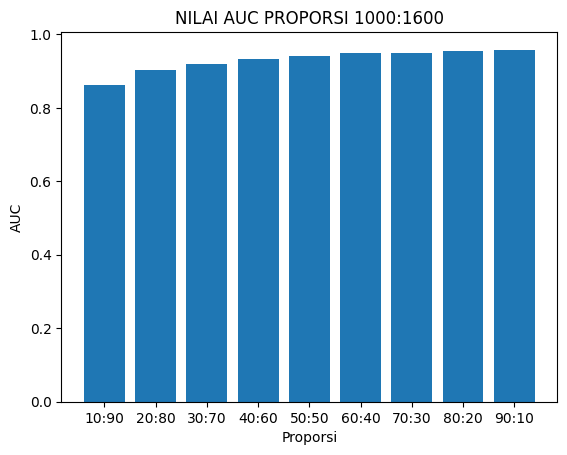

In [339]:
data_auc = {'10:90':nilai_auc_10,'20:80':nilai_auc_20,'30:70':nilai_auc_30,'40:60':nilai_auc_40,'50:50':nilai_auc_50,'60:40':nilai_auc_60,'70:30':nilai_auc_70,'80:20':nilai_auc_80,'90:10':nilai_auc_90}
proporsi = list(data_auc.keys())
nilai_auc = list(data_auc.values())

plt.bar(proporsi, nilai_auc)
plt.title('NILAI AUC PROPORSI 1000:1600')
plt.xlabel('Proporsi')
plt.ylabel('AUC')

VALIDASI MODEL

In [340]:
x_all = np.concatenate((Xn,Xp))
y_all = np.concatenate((Yn,Yp))

y_all = y_all.flatten()

In [341]:
# 10-fold Validation
cv_result = cross_val_score(ensemble,x_all, y_all, cv = 10,scoring='roc_auc')

cv_result


array([0.9999019 , 0.9955506 , 0.9820757 , 0.98394375, 0.96003924,
       0.97322596, 0.94377248, 0.91468673, 0.95095004, 0.90134521])

In [342]:
cv_result.mean()

0.9605491628809973